In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Analysis of Super Store - DA.csv'
df = pd.read_csv(file_path, encoding='ascii')

# Display the first few rows of the dataframe
print(df.head())



# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])




        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

In [3]:
# Display summary statistics
df_describe = df.describe()
df_describe


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

,0
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


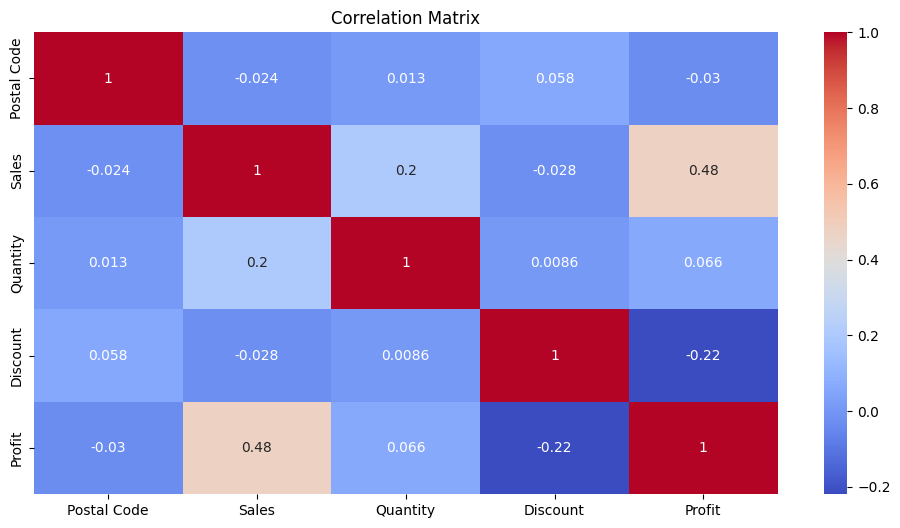

In [8]:
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm') # Use numeric_df here
plt.title('Correlation Matrix')
plt.show()


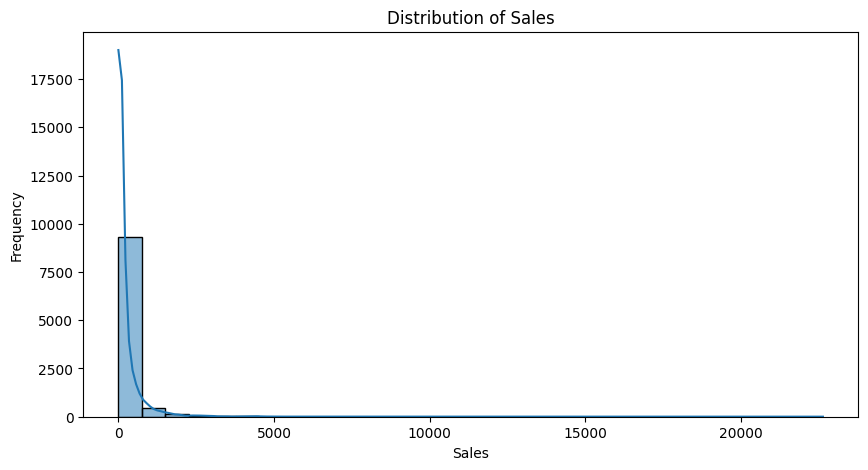

In [9]:
# Plot distribution of Sales
plt.figure(figsize=(10, 5))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

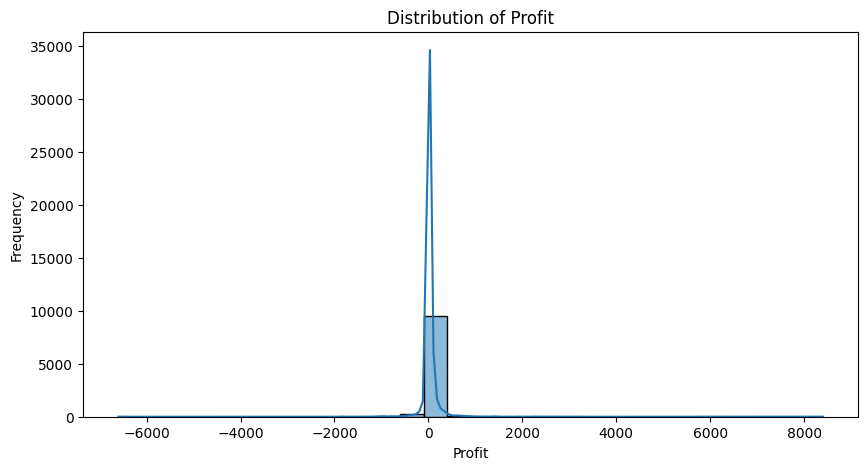

In [10]:

# Plot distribution of Profit
plt.figure(figsize=(10, 5))
sns.histplot(df['Profit'], bins=30, kde=True)
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

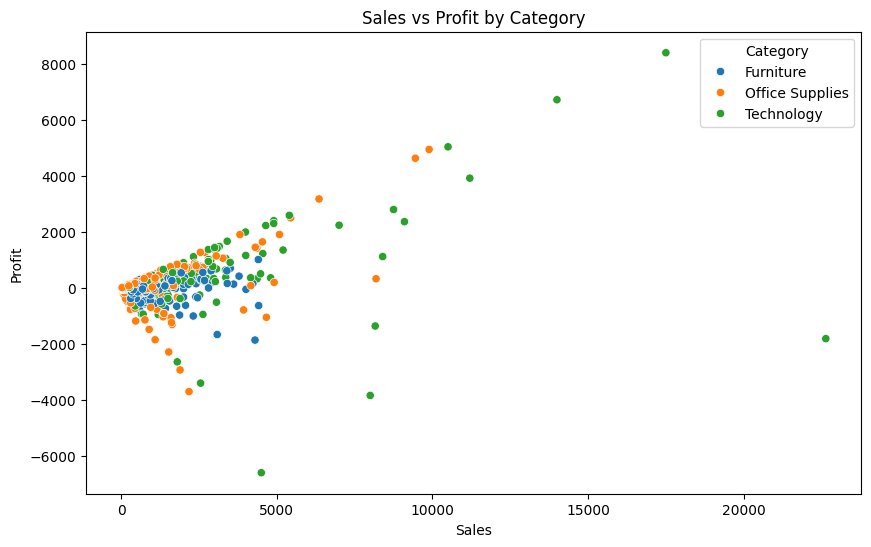

In [11]:
# Plot Sales vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category')
plt.title('Sales vs Profit by Category')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

In [12]:
# Print the information and summary statistics
print(df_info)
print(df_describe)
print('Missing values in each column:\
', missing_values)

None
        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000
Missing values in each column: Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


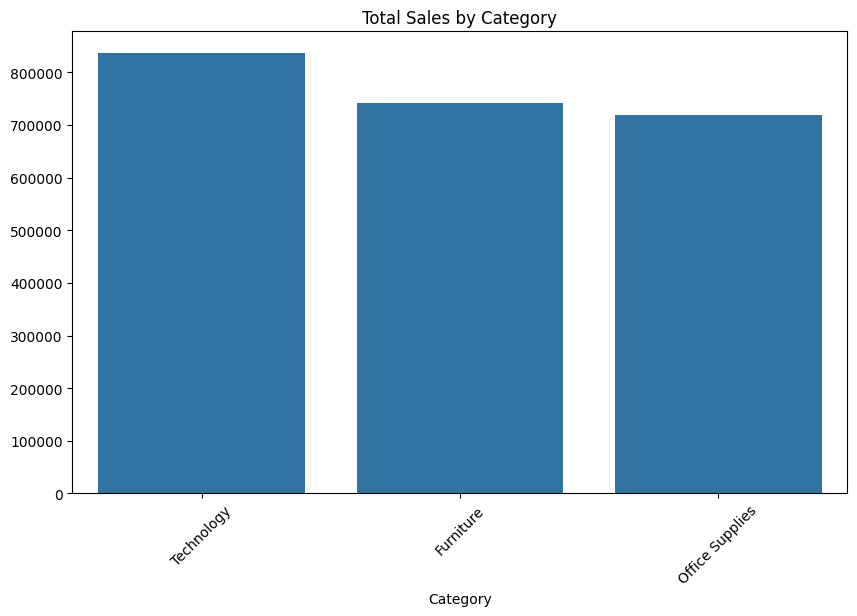

In [15]:
# Key findings:

# Total Sales: $2.3M with $286K in profits
# Average discount rate: 15.62%
# Copiers and Phones are the most profitable sub-categories
# Standard Class shipping is most common
# West and East regions show higher profitability
# Corporate and Home Office segments have higher sales and profit


# Category Analysis
plt.figure(figsize=(10, 6))
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Sales by Category')
plt.xticks(rotation=45)
plt.show()



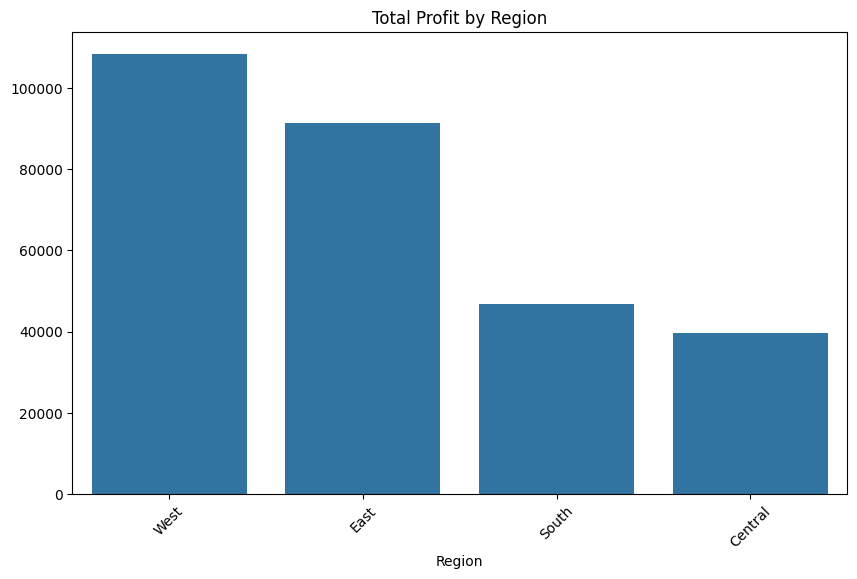

In [16]:
# Region Analysis
plt.figure(figsize=(10, 6))
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
sns.barplot(x=region_profit.index, y=region_profit.values)
plt.title('Total Profit by Region')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

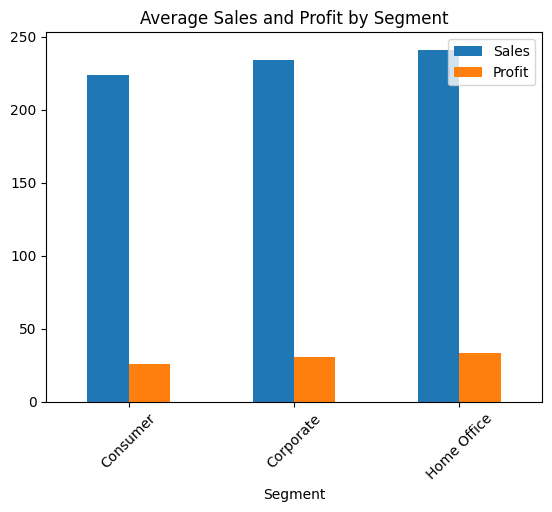

In [17]:
# Segment Analysis
plt.figure(figsize=(10, 6))
segment_analysis = df.groupby('Segment')[['Sales', 'Profit']].mean()
segment_analysis.plot(kind='bar')
plt.title('Average Sales and Profit by Segment')
plt.xticks(rotation=45)
plt.show()

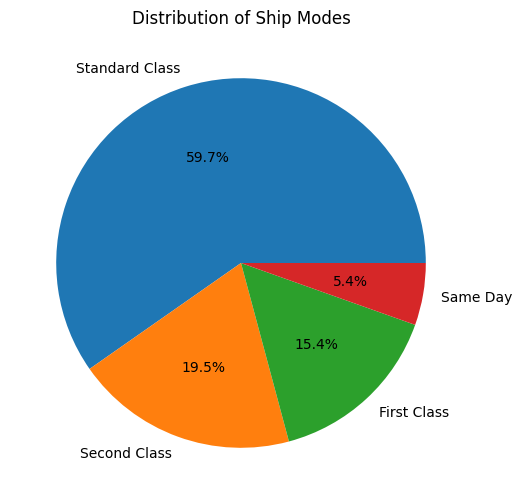

In [18]:
# Ship Mode Analysis
ship_mode_counts = df['Ship Mode'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(ship_mode_counts.values, labels=ship_mode_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Ship Modes')
plt.show()


In [19]:
# Print summary statistics
print("\
Key Metrics:")
print("Total Sales: $", round(df['Sales'].sum(), 2))
print("Total Profit: $", round(df['Profit'].sum(), 2))
print("Average Discount: ", round(df['Discount'].mean() * 100, 2), "%")
print("\
Top 5 Most Profitable Sub-Categories:")
print(df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head())


Key Metrics:
Total Sales: $ 2297200.86
Total Profit: $ 286397.02
Average Discount:  15.62 %
Top 5 Most Profitable Sub-Categories:
Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Name: Profit, dtype: float64


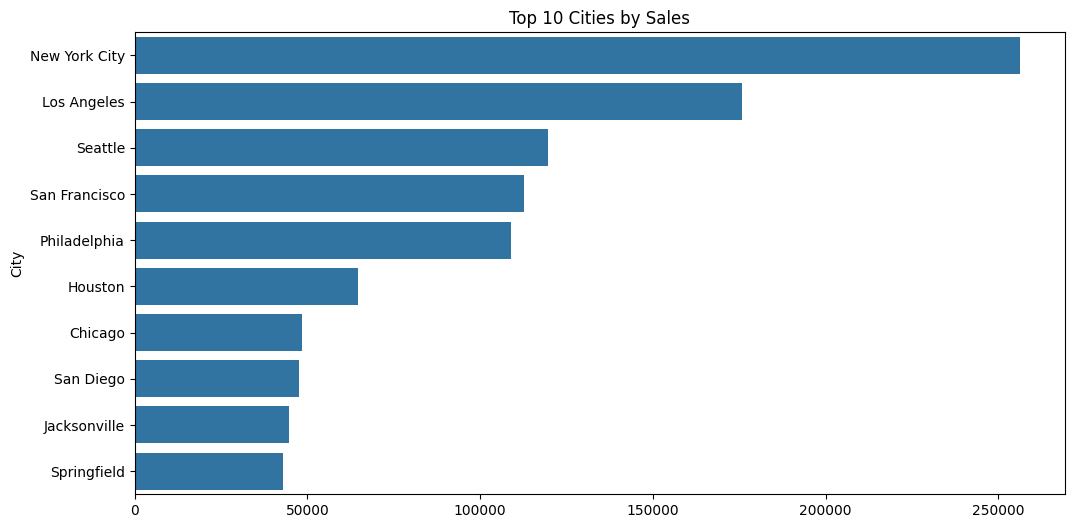

In [20]:
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100

# Top 10 Cities by Sales
plt.figure(figsize=(12, 6))
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top 10 Cities by Sales')
plt.show()


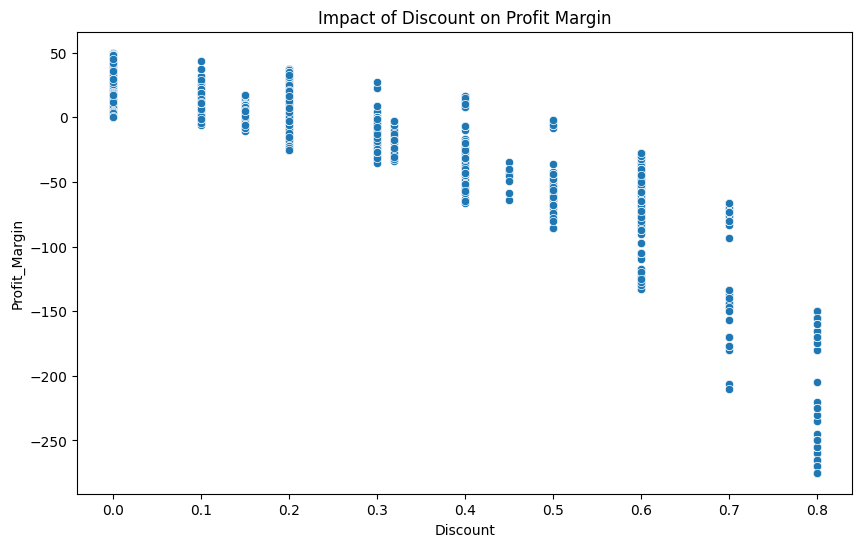

In [21]:
# Discount Impact on Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit_Margin')
plt.title('Impact of Discount on Profit Margin')
plt.show()


In [22]:
print("Key Business Insights:")
print("\
Top 5 Cities by Sales:")
print(top_cities.head().to_string())
print("\
Average Profit Margin: ", round(df['Profit_Margin'].mean(), 2), "%")
print("\
Correlation between Discount and Profit Margin:",
      round(df['Discount'].corr(df['Profit_Margin']), 3))

# Sub-Category Performance
sub_cat_perf = df.groupby('Sub-Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Profit_Margin': 'mean'
}).sort_values('Profit', ascending=False).head()
print("\
Top 5 Sub-Categories Performance:")
print(sub_cat_perf)


Key Business Insights:
Top 5 Cities by Sales:
City
New York City    256368.161
Los Angeles      175851.341
Seattle          119540.742
San Francisco    112669.092
Philadelphia     109077.013
Average Profit Margin:  12.03 %
Correlation between Discount and Profit Margin: -0.864
Top 5 Sub-Categories Performance:
                   Sales      Profit  Profit_Margin
Sub-Category                                       
Copiers       149528.030  55617.8249      31.719363
Phones        330007.054  44515.7306      11.922197
Accessories   167380.318  41936.6357      21.820968
Paper          78479.206  34053.5693      42.560036
Binders       203412.733  30221.7633     -19.959510


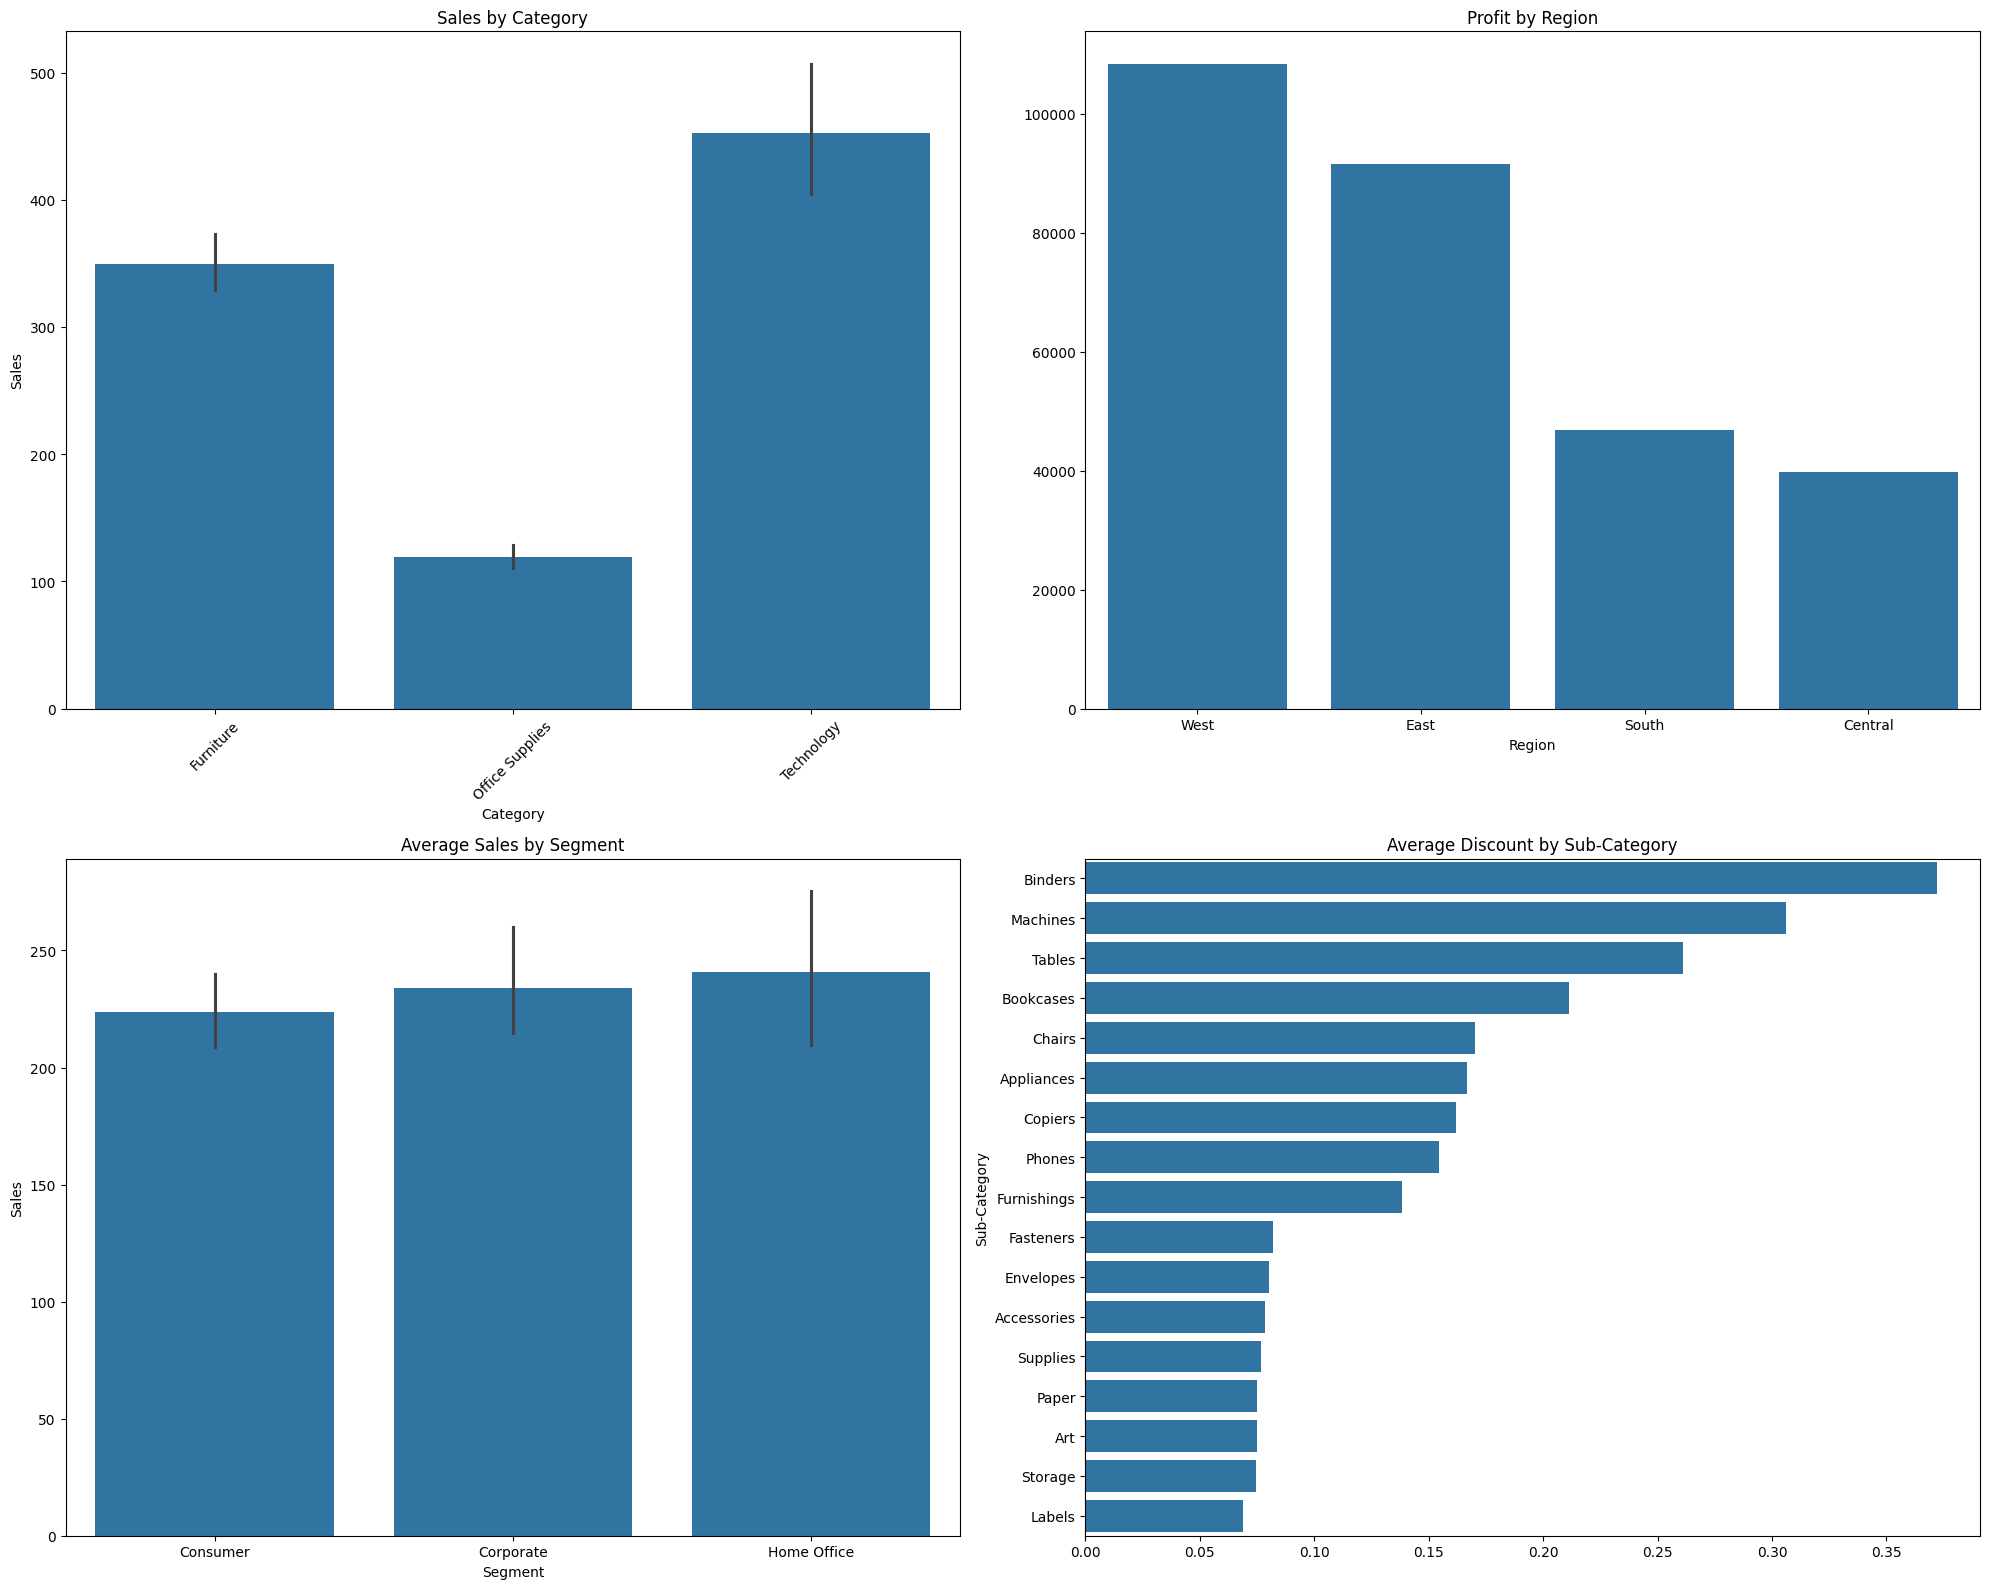

Key Statistics:
Category Sales Summary:
Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64
Region Profit Summary:
Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64
Segment Sales Summary:
Segment
Home Office    240.972041
Corporate      233.823300
Consumer       223.733644
Name: Sales, dtype: float64


In [23]:


# Set up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Sales by Category
sns.barplot(data=df, x='Category', y='Sales', ax=axes[0,0])
axes[0,0].set_title('Sales by Category')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Profit by Region
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
sns.barplot(x=region_profit.index, y=region_profit.values, ax=axes[0,1])
axes[0,1].set_title('Profit by Region')

# 3. Average Sales by Segment
sns.barplot(data=df, x='Segment', y='Sales', ax=axes[1,0])
axes[1,0].set_title('Average Sales by Segment')

# 4. Average Discount by Sub-Category
sub_cat_discount = df.groupby('Sub-Category')['Discount'].mean().sort_values(ascending=False)
sns.barplot(x=sub_cat_discount.values, y=sub_cat_discount.index, ax=axes[1,1])
axes[1,1].set_title('Average Discount by Sub-Category')

plt.tight_layout()
plt.show()

# Print key statistics
print("\
Key Statistics:")
print("\
Category Sales Summary:")
print(df.groupby('Category')['Sales'].sum().sort_values(ascending=False))

print("\
Region Profit Summary:")
print(region_profit)

print("\
Segment Sales Summary:")
print(df.groupby('Segment')['Sales'].mean().sort_values(ascending=False))

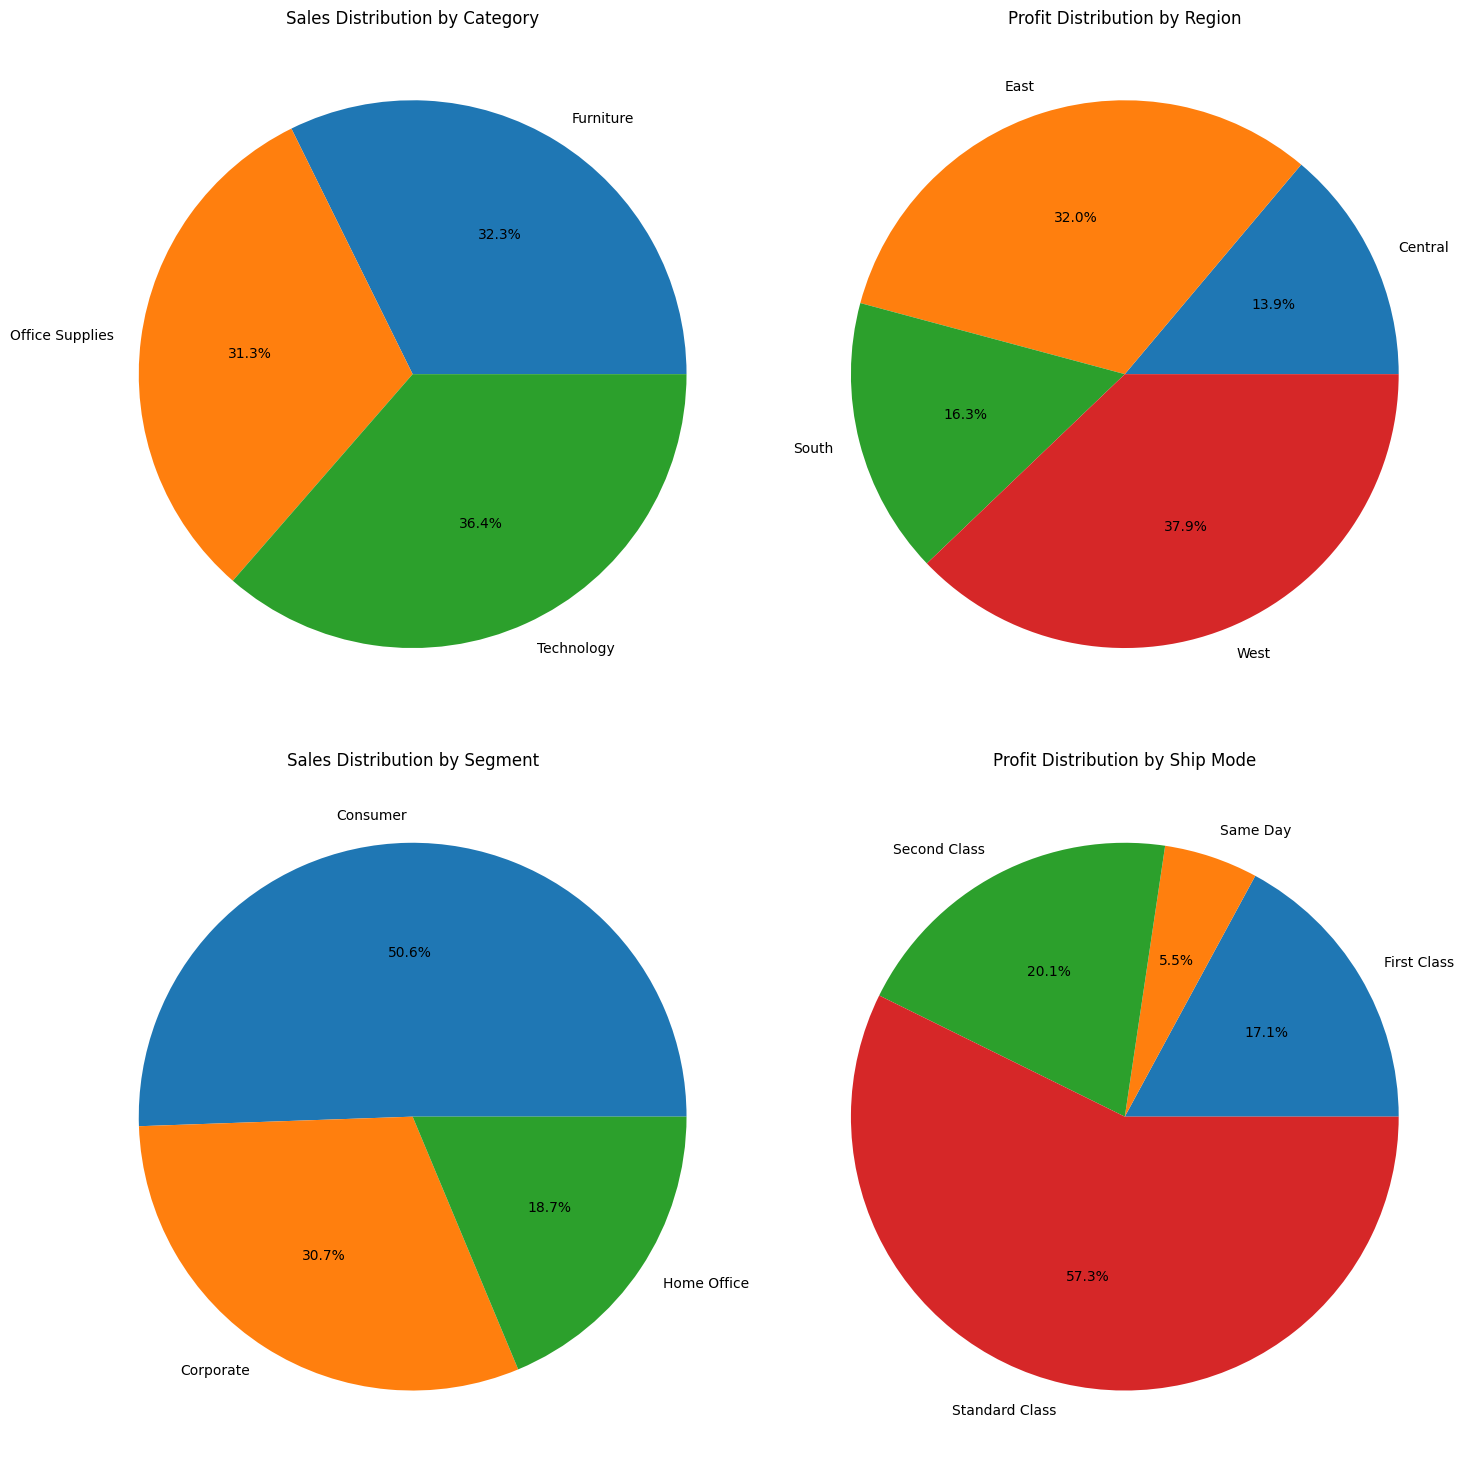

Key Distribution Metrics:
Sales by Category (%):
Category
Furniture          32.3
Office Supplies    31.3
Technology         36.4
Name: Sales, dtype: float64
Profit by Region (%):
Region
Central    13.9
East       32.0
South      16.3
West       37.9
Name: Profit, dtype: float64


In [24]:
# The pie charts reveal:

# Technology dominates sales (36.4%)
# West region leads profits (37.9%)
# Standard shipping is most profitable



# Create a figure with multiple pie charts
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

# Sales by Category
sales_by_category = df.groupby('Category')['Sales'].sum()
ax1.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%')
ax1.set_title('Sales Distribution by Category')

# Profit by Region
profit_by_region = df.groupby('Region')['Profit'].sum()
ax2.pie(profit_by_region, labels=profit_by_region.index, autopct='%1.1f%%')
ax2.set_title('Profit Distribution by Region')

# Sales by Segment
sales_by_segment = df.groupby('Segment')['Sales'].sum()
ax3.pie(sales_by_segment, labels=sales_by_segment.index, autopct='%1.1f%%')
ax3.set_title('Sales Distribution by Segment')

# Profit by Ship Mode
ship_mode_profit = df.groupby('Ship Mode')['Profit'].sum()
ax4.pie(ship_mode_profit, labels=ship_mode_profit.index, autopct='%1.1f%%')
ax4.set_title('Profit Distribution by Ship Mode')

plt.tight_layout()
plt.show()

print("\
Key Distribution Metrics:")
print("\
Sales by Category (%):")
print((sales_by_category/sales_by_category.sum() * 100).round(1))

print("\
Profit by Region (%):")
print((profit_by_region/profit_by_region.sum() * 100).round(1))

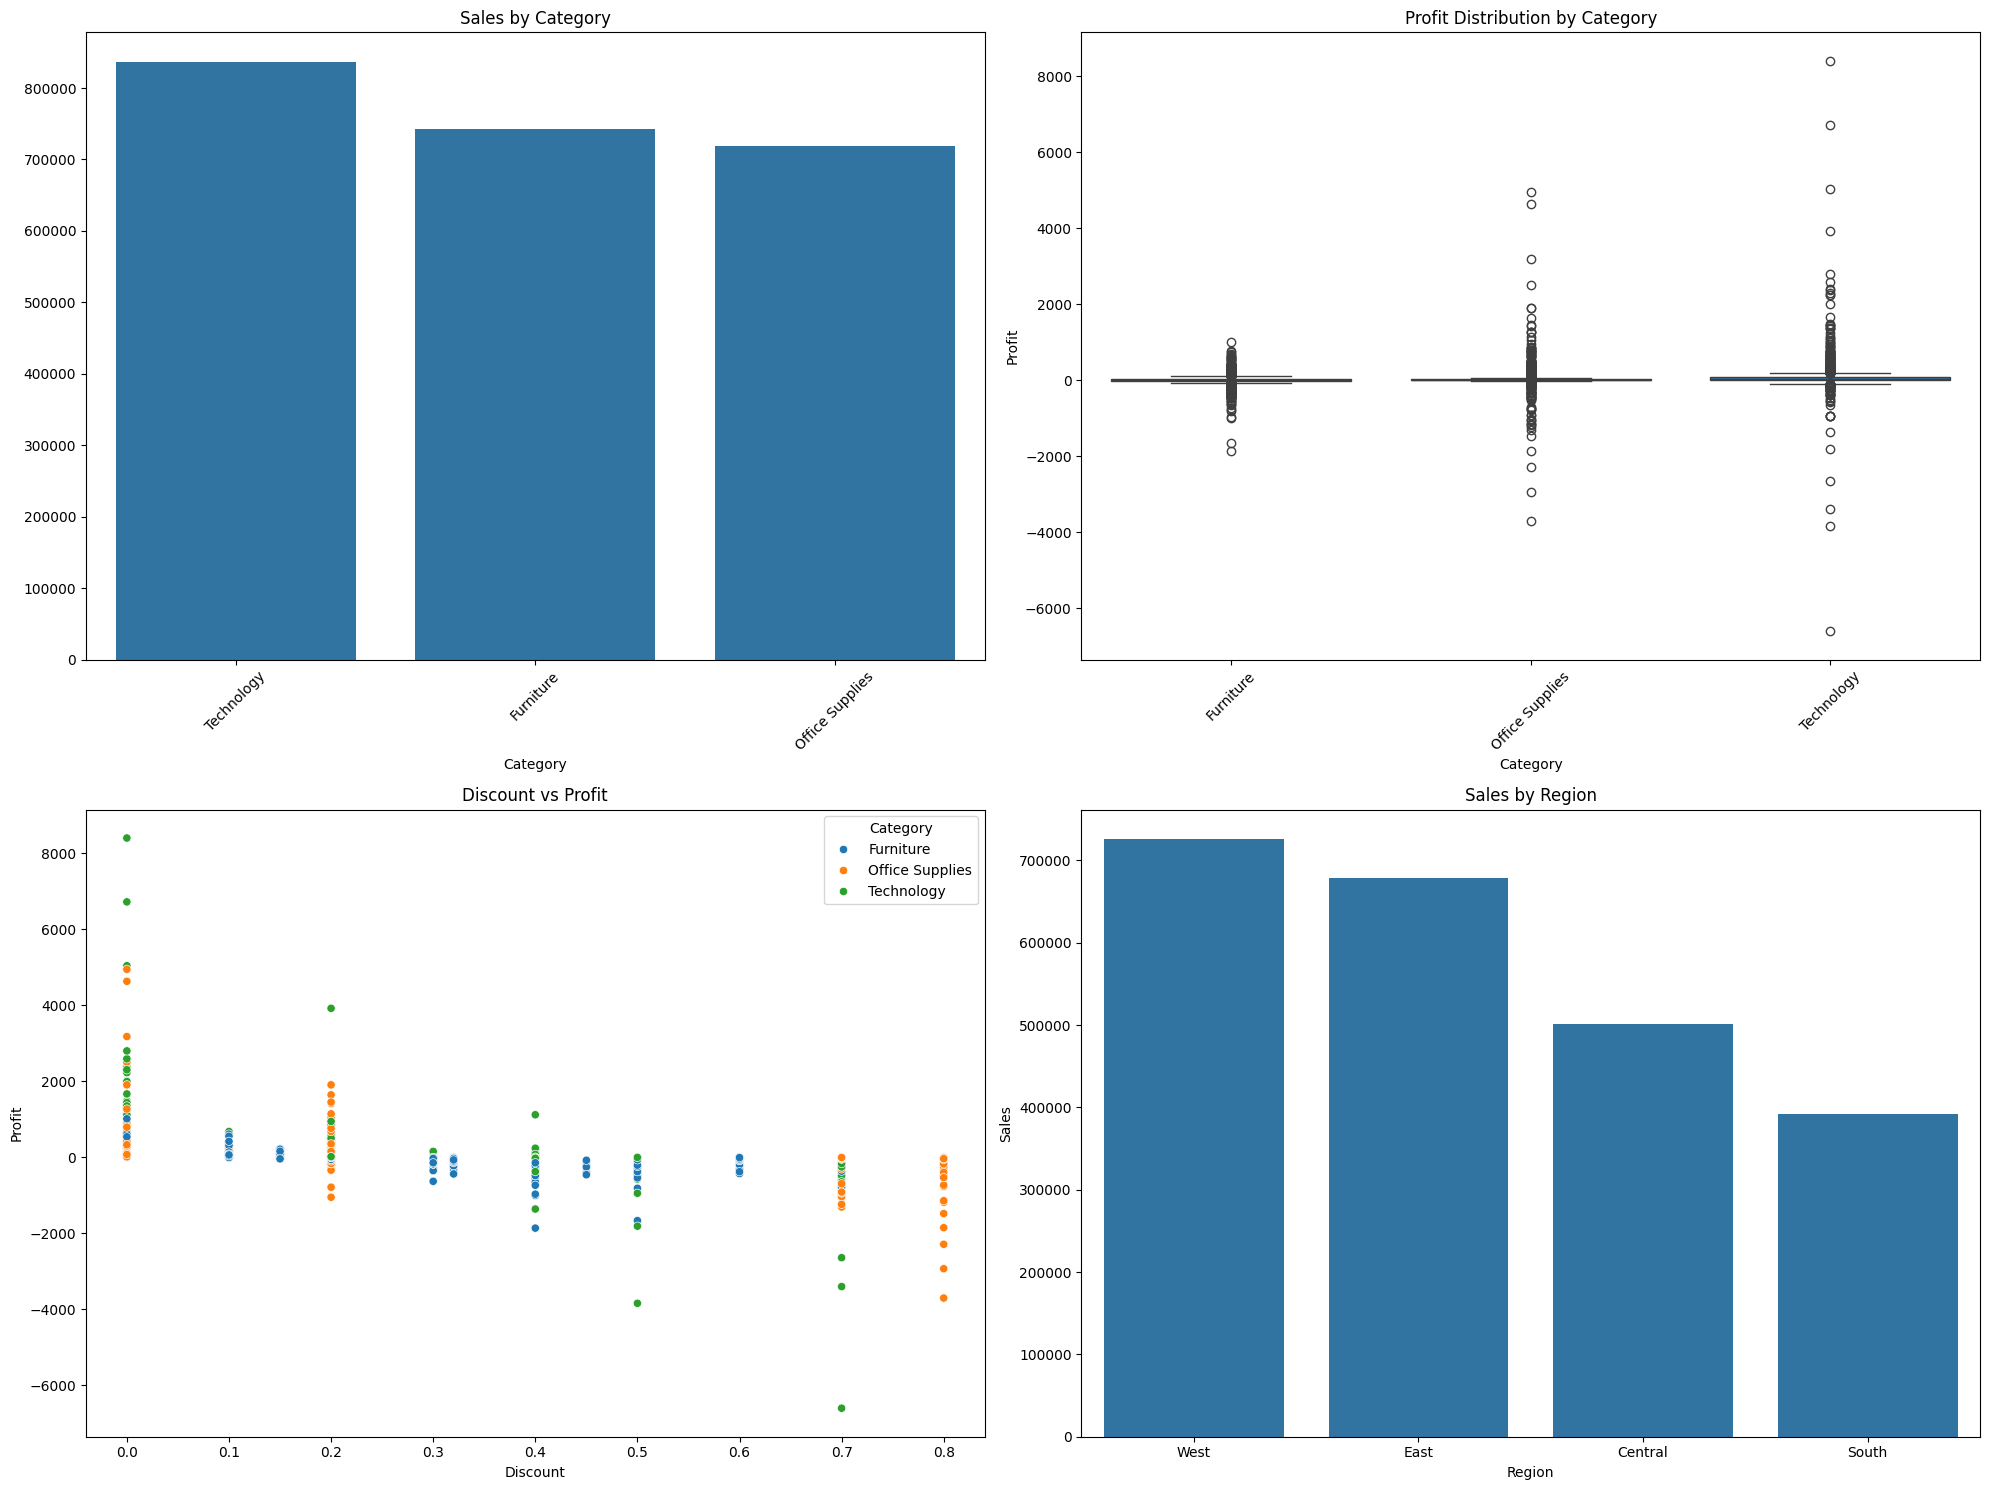

Overall Business Metrics:
Total Sales: $ 2297200.86
Total Profit: $ 286397.02
Average Profit Margin:  12.47 %
Category Performance:
                       Sales       Profit  Quantity
Category                                           
Technology       836154.0330  145454.9481      6939
Furniture        741999.7953   18451.2728      8028
Office Supplies  719047.0320  122490.8008     22906
Regional Performance:
               Sales       Profit  Quantity
Region                                     
West     725457.8245  108418.4489     12266
East     678781.2400   91522.7800     10618
Central  501239.8908   39706.3625      8780
South    391721.9050   46749.4303      6209


In [25]:
# Key findings:

# Total Sales: $2.3M with 12.47% profit margin
# Technology leads in sales ($836K) and profit ($145K)
# West region dominates with $725K sales and $108K profit
# Clear negative correlation between discounts and profit



# Create a comprehensive dashboard
fig = plt.figure(figsize=(20, 15))

# 1. Sales Trends
plt.subplot(2, 2, 1)
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Sales by Category')
plt.xticks(rotation=45)

# 2. Profit Distribution
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Category', y='Profit')
plt.title('Profit Distribution by Category')
plt.xticks(rotation=45)

# 3. Discount vs Profit
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Discount vs Profit')

# 4. Regional Performance
plt.subplot(2, 2, 4)
region_metrics = df.groupby('Region').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).sort_values('Sales', ascending=False)
sns.barplot(x=region_metrics.index, y=region_metrics['Sales'])
plt.title('Sales by Region')

plt.tight_layout()
plt.show()

# Print key metrics
print("\
Overall Business Metrics:")
print("\
Total Sales: $", round(df['Sales'].sum(), 2))
print("Total Profit: $", round(df['Profit'].sum(), 2))
print("Average Profit Margin: ", round((df['Profit'].sum() / df['Sales'].sum()) * 100, 2), "%")

# Category Performance
category_performance = df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).sort_values('Sales', ascending=False)
print("\
Category Performance:")
print(category_performance)

# Regional Analysis
print("\
Regional Performance:")
print(region_metrics)

In [27]:
# export analysis of report




# Create report content
report_content = f"""
# Superstore Analysis Report

## Key Performance Metrics
- Total Sales: ${df['Sales'].sum():,.2f}
- Total Profit: ${df['Profit'].sum():,.2f}
- Profit Margin: {(df['Profit'].sum() / df['Sales'].sum() * 100):.2f}%

## Category Performance
{df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'}).round(2).to_markdown()}

## Regional Performance
{df.groupby('Region').agg({'Sales': 'sum', 'Profit': 'sum'}).round(2).to_markdown()}

## Key Findings
- Technology leads in sales with highest profit margin
- West region is the best performing region
- Higher discounts generally lead to lower profits
- Standard shipping is the most profitable delivery mode

## Recommendations
- Focus on technology product expansion
- Optimize discount strategy
- Replicate West region's success factors
- Review shipping options pricing
"""

# Save as markdown file
with open('superstore_analysis_report.md', 'w') as f:
    f.write(report_content)

print("Report generated as 'superstore_analysis_report.md'")
print("You can download it from https://julius.ai/files?filename=superstore_analysis_report.md")

Report generated as 'superstore_analysis_report.md'
You can download it from https://julius.ai/files?filename=superstore_analysis_report.md


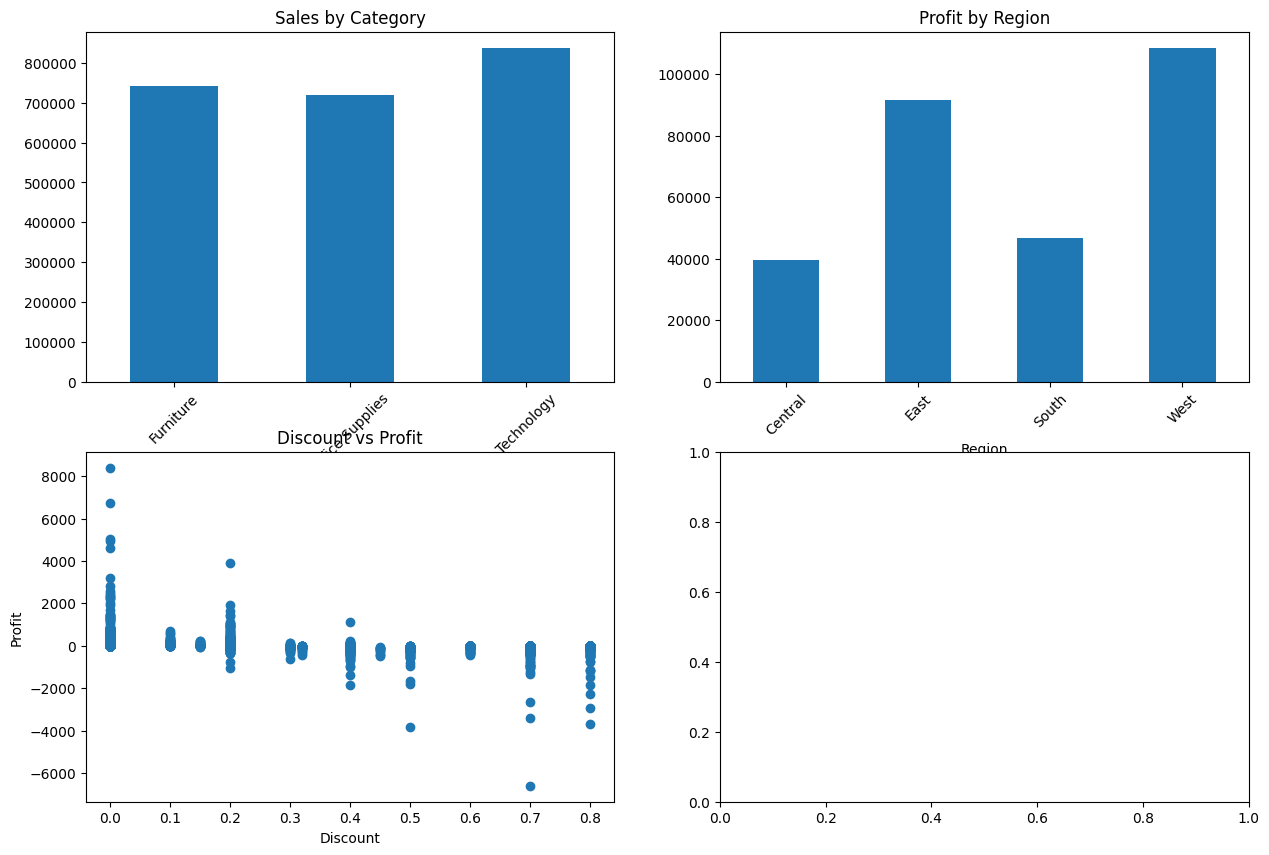

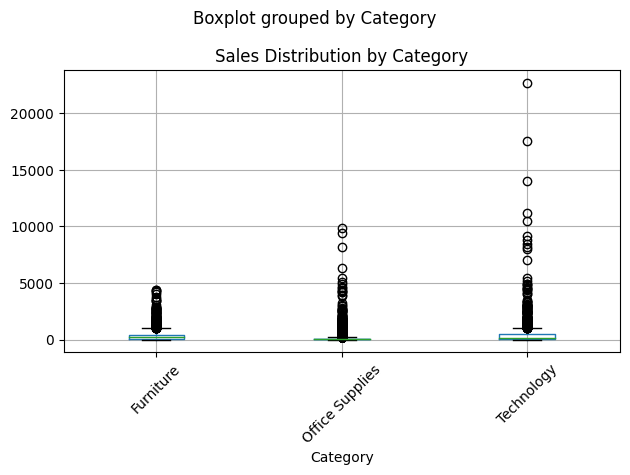

Segment Analysis:
                  Sales     Profit  Quantity
Segment                                     
Consumer     1161401.34  134119.21     19521
Corporate     706146.37   91979.13     11608
Home Office   429653.15   60298.68      6744


In [28]:
#check score

# Create a figure with subplots
fig = plt.figure(figsize=(15, 10))

# 1. Sales by Category
plt.subplot(2, 2, 1)
df.groupby('Category')['Sales'].sum().plot(kind='bar')
plt.title('Sales by Category')
plt.xticks(rotation=45)

# 2. Profit by Region
plt.subplot(2, 2, 2)
df.groupby('Region')['Profit'].sum().plot(kind='bar')
plt.title('Profit by Region')
plt.xticks(rotation=45)

# 3. Discount vs Profit
plt.subplot(2, 2, 3)
plt.scatter(df['Discount'], df['Profit'])
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')

# 4. Sales Distribution
plt.subplot(2, 2, 4)
df.boxplot(column='Sales', by='Category')
plt.title('Sales Distribution by Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('superstore_analysis_visuals.png')
plt.show()

# Additional insights
segment_analysis = df.groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).round(2)

print("\
Segment Analysis:")
print(segment_analysis)